# Space Mission Analysis

Space race is started after world war II during cold war between Russia and America, From launching missiles to taking humans onto the mooon, creating a Space station 400Km above earth, launching spacecrafts to mars and twin voyagers reaching outside solar system.
Dataset used in this analysis contains all the Space missions carried out from 1957. The python libraries used for this analysis are

- numpy for Numerical calculations.
- Seaborn for Visulizations.
- matplotlib for statistical analysis and visualisations.
- pandas for data manipulation

## Downloading the Dataset

We have Downloaded the Dataset from Kaggle.

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
dataset_url = 'https://www.kaggle.com/agirlcoding/all-space-missions-from-1957' 

The dataset has been downloaded and extracted.

In [2]:
data_dir = './all-space-missions-from-1957'

In [3]:
import os
os.listdir(data_dir)

['Space_Corrected.csv']

## Data Preparation and Cleaning

Description of Data (space missions from 1957)

- Company Name - Space organization undertaking missiom
- Location - Adrress location of space center from where the spacecraft is launched
- Datum - Lift off date & time
- Detail - Details of the rockets used and missions
- Status Rocket - The status of rocket i.e retired or active
- Rocket - Cost of mission in millions
- Status missions - Mission Status whether success or fail

In [4]:
import pandas as pd
import numpy as np

# Loading csv file into pandas dataframe
space_mission_df = pd.read_csv("./all-space-missions-from-1957/Space_Corrected.csv")

# info about the dataframe i.e columns and thier datatypes
space_mission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [5]:
# Dropping columns
space_mission_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'],inplace=True)

#List of columns
space_mission_df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

In [6]:
# shows shape i.e (rows X columns)
space_mission_df.shape

(4324, 7)

In [7]:
# Instead of mean median standard deviation since no numeric values are present describe function shows count, unique, top and Frequent occurences
space_mission_df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Tue Jun 26, 1973",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [8]:
# First 10 records
space_mission_df.head(10)

# Last 10 records
space_mission_df.tail(10)

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Apr 28, 1958 02:53 UTC",Vanguard | Vanguard TV5,StatusRetired,NaN,Failure
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Apr 27, 1958 09:01 UTC",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure
4316,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA","Wed Mar 26, 1958 17:38 UTC",Juno I | Explorer 3,StatusRetired,NaN,Success
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Mar 17, 1958 12:15 UTC",Vanguard | Vanguard 1,StatusRetired,NaN,Success
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,NaN,Failure
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [9]:
# Retrieving specific column
space_mission_df['Detail']

0       Falcon 9 Block 5 | Starlink V1 L9 & BlackSky
1                Long March 2D | Gaofen-9 04 & Q-SAT
2                 Starship Prototype | 150 Meter Hop
3       Proton-M/Briz-M | Ekspress-80 & Ekspress-103
4                         Atlas V 541 | Perseverance
                            ...                     
4319                       Vanguard | Vanguard TV3BU
4320                             Juno I | Explorer 1
4321                         Vanguard | Vanguard TV3
4322                      Sputnik 8K71PS | Sputnik-2
4323                      Sputnik 8K71PS | Sputnik-1
Name: Detail, Length: 4324, dtype: object

In [10]:
# Adding extra column with name Country creating from Loacation column
space_mission_df['Country'] = space_mission_df['Location'].str.split(', ').str[-1]
space_mission_df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission', 'Country'],
      dtype='object')

In [11]:
# Creating column Spacecraft with rocket details
space_mission_df['Spacecraft'] = space_mission_df['Detail'].str.split('|').str[0].str.rstrip()
space_mission_df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Spacecraft
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,Falcon 9 Block 5
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,Long March 2D
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,Starship Prototype
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Proton-M/Briz-M
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,Atlas V 541
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,Vanguard
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,Juno I
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,Vanguard
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,Sputnik 8K71PS


In [12]:
# Column for the name of mission
space_mission_df['Mission'] = space_mission_df['Detail'].str.split('|').str[1].str.lstrip()

#locating specifi row with index
space_mission_df.loc[2540]

Company Name                             RVSN USSR
Location          Site 107/1, Kapustin Yar, Russia
Datum                   Fri Dec 22, 1978 22:00 UTC
Detail            Cosmos-3M (11K65M) | Cosmos 1065
Status Rocket                        StatusRetired
 Rocket                                        NaN
Status Mission                             Success
Country                                     Russia
Spacecraft                      Cosmos-3M (11K65M)
Mission                                Cosmos 1065
Name: 2540, dtype: object

In [13]:
# Dropping off Detail Column
space_mission_df.drop(columns=['Detail'],inplace=True)

In [14]:
# Creating Spearate column for datetime, year  and month with pd.datetime datatype
space_mission_df['Date'] = pd.to_datetime(space_mission_df.Datum,utc=True)
space_mission_df['Year'] = pd.DatetimeIndex(space_mission_df.Date).year
space_mission_df['Month'] = pd.DatetimeIndex(space_mission_df.Date).month
space_mission_df.drop('Datum',axis=1,inplace=True)
space_mission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Company Name    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Status Rocket   4324 non-null   object             
 3    Rocket         964 non-null    object             
 4   Status Mission  4324 non-null   object             
 5   Country         4324 non-null   object             
 6   Spacecraft      4324 non-null   object             
 7   Mission         4324 non-null   object             
 8   Date            4324 non-null   datetime64[ns, UTC]
 9   Year            4324 non-null   int64              
 10  Month           4324 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 371.7+ KB


In [15]:
# Renaming column Name
space_mission_df.rename(columns={" Rocket" : "Rocket"},inplace=True)

#Calculating number of null values in each column
space_mission_df.isnull().sum()

Company Name         0
Location             0
Status Rocket        0
Rocket            3360
Status Mission       0
Country              0
Spacecraft           0
Mission              0
Date                 0
Year                 0
Month                0
dtype: int64

In [16]:
# Filling NaN values with 0
space_mission_df.Rocket.fillna(0)

0        50.0 
1       29.75 
2            0
3        65.0 
4       145.0 
         ...  
4319         0
4320         0
4321         0
4322         0
4323         0
Name: Rocket, Length: 4324, dtype: object

## Exploratory Analysis and Visualization

Exploring the Dataset and visualizing throgh graphs.

Let's begin by importingmatplotlib.pyplot and seaborn.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

The organizations that have conducted space missions and number of launches conducted by each.

In [19]:
# Companies and number of times launched spacecraft
space_mission_df['Company Name'].value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
ESA                   13
Rocket Lab            13
Eurockot              13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
AMBA                   8
CNES                   8
MITT                   7
JAXA                   7
Land Launch            7
CASIC                  5
UT                     5
KCST                   5
CECLES                 4
Arm??e de l'Air        4
Exos                   4


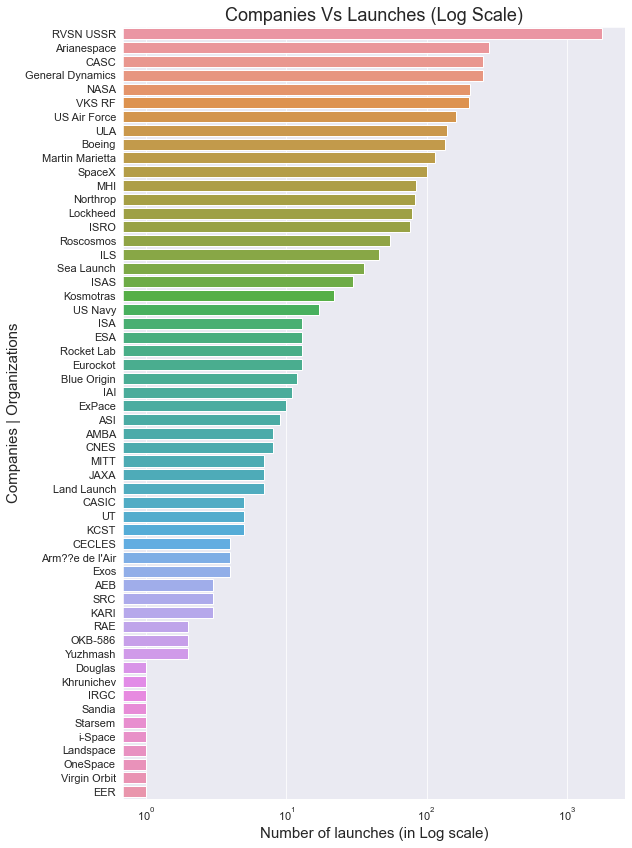

In [20]:
plt.figure(figsize=(9,12))
ax = sns.countplot(y='Company Name', data=space_mission_df,order=space_mission_df["Company Name"].value_counts().index)
# Scale log is 10^
ax.set_xscale("log")
ax.set_title("Companies Vs Launches (Log Scale)",fontsize=18)
ax.set_xlabel('Number of launches (in Log scale)',fontsize=15)
ax.set_ylabel("Companies | Organizations",fontsize=15)
ax.tick_params(labelsize=11)
plt.tight_layout()

The Countries from where the Rockets being launched since 1957

In [21]:
space_mission_df['Country'].value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Brazil                               3
Barents Sea                          3
Gran Canaria                         2
Shahrud Missile Test Site            1
Pacific Missile Range Facility       1
Yellow Sea                           1
Name: Country, dtype: int64

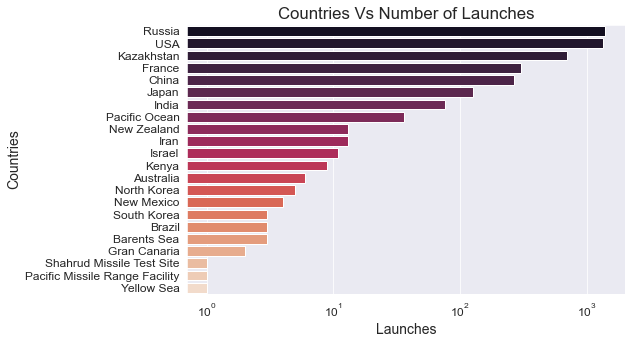

In [22]:
ax=sns.countplot(y='Country', order=space_mission_df["Country"].value_counts().index, data=space_mission_df,palette='rocket')
ax.set_title("Countries Vs Number of Launches")
ax.set_ylabel('Countries')
ax.set_xlabel('Launches')
ax.set_xscale('log')
ax.tick_params(labelsize=12)
plt.tight_layout()

Exploring more about Last 10 Years, total number of launches conducted in last 10 years

In [23]:
space_mission_df['Year'].astype(int)
last_ten_years_df = space_mission_df[space_mission_df['Year']>2009]
last_ten_years_df['Company Name'].count()

739

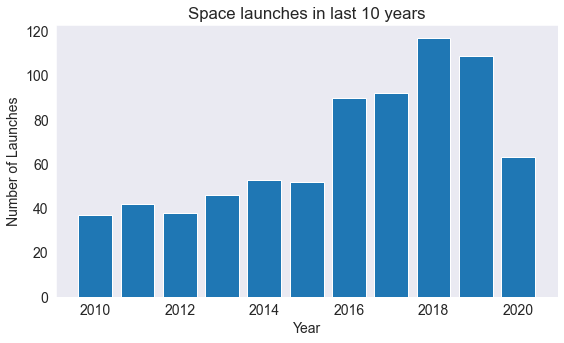

In [24]:
x = last_ten_years_df['Year'].value_counts()
plt.bar(x.index,x.values)
plt.grid(False)
plt.title('Space launches in last 10 years')
plt.xlabel('Year')
plt.ylabel('Number of Launches');

Rough cost of Space missions in last 10 years (in million dollars)

In [30]:
last_ten_years_df.Rocket.astype('float').sum()

45042.380000000005

In [63]:
last_ten_years_df['Rocket'] = last_ten_years_df['Rocket'].astype(float).fillna(0)
#last_ten_years_df['Rocket'] = pd.to_numeric(last_ten_years_df['Rocket'],errors='coerce')

x = last_ten_years_df.groupby(['Year','Company Name'])['Rocket'].sum()
x.unstack(level=0)

<ipython-input-63-b23426ba0084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_ten_years_df['Rocket'] = last_ten_years_df['Rocket'].astype(float).fillna(0)


Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Company Name,,,,,,,,,,,
Arianespace,1200.0,880.0,1280.0,637.0,1037.0,1311.0,1274.00,1111.00,1074.00,874.00,497.00
Blue Origin,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,NaN
CASC,NaN,0.0,0.0,0.0,NaN,5.3,599.67,427.61,1023.88,769.91,520.51
CASIC,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.00,NaN,NaN,NaN
ESA,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eurockot,41.8,NaN,NaN,NaN,NaN,NaN,41.80,41.80,41.80,NaN,NaN
ExPace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,28.30
Exos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN
IAI,0.0,NaN,NaN,NaN,0.0,NaN,0.00,NaN,NaN,NaN,0.00


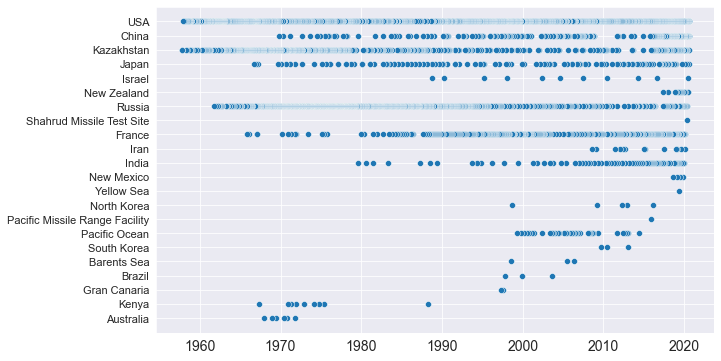

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Date',y='Country', data=space_mission_df)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=11);

Status of Missions in last 10 years

In [37]:
last_ten_years_df['Status Mission'].value_counts()

Success              690
Failure               35
Partial Failure       12
Prelaunch Failure      2
Name: Status Mission, dtype: int64

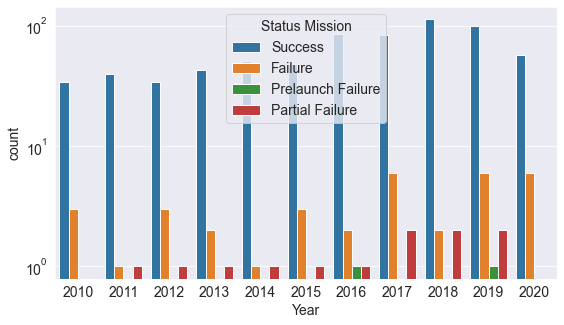

In [46]:
sns.countplot(x='Year',data=last_ten_years_df,hue='Status Mission');
plt.yscale('log');

## Asking and Answering Questions

1. Which is most used Spacecraft
2. Companies with most number of active rockets
3. Which are the top launching locations
4. Most favorite month for space launches
5. SpaceX stats in Space Race

#### Which is most used Spacecraft

In [39]:
most_used = space_mission_df['Spacecraft'].value_counts().head(15)
most_used

Cosmos-3M (11K65M)      446
Voskhod                 299
Molniya-M /Block ML     128
Cosmos-2I (63SM)        126
Soyuz U                 125
Tsyklon-3               122
Tsyklon-2               106
Vostok-2M                93
Molniya-M /Block 2BL     87
Ariane 5 ECA             75
Delta II 7925            62
Atlas-SLV3 Agena-D       47
Vostok-2                 45
Molniya-M /Block L       44
Ariane 44L               41
Name: Spacecraft, dtype: int64

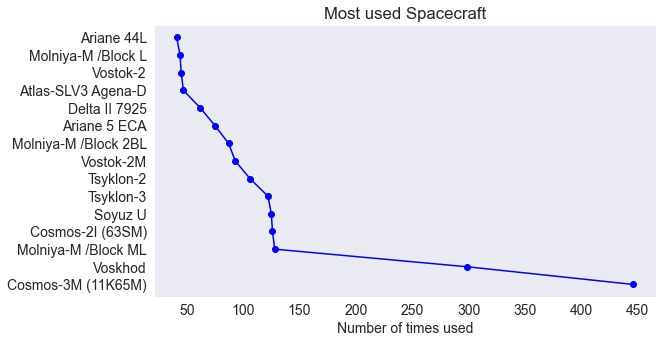

In [40]:
plt.grid(False)
plt.title('Most used Spacecraft')
plt.plot(most_used,most_used.index,'o-b')
plt.xlabel('Number of times used');

In [41]:
launches = space_mission_df['Spacecraft'].value_counts()
successful = space_mission_df[space_mission_df['Status Mission']=='Success']
successful = successful['Spacecraft'].value_counts()

In [42]:
Success_percent = (successful/launches)*100
Success_percent[Success_percent==100].count()

179

**Observation**

Cosmos-3M (11K65M) is the most used spaceraft
And total 179 Spacecrafts having 100% succes rate

#### Companies with most number of active rockets

In [43]:
active_rockets = space_mission_df[space_mission_df['Status Rocket'] == 'StatusActive']['Company Name'].value_counts().head(10)
active_rockets

CASC           211
Arianespace    114
ULA             87
Northrop        63
ISRO            50
SpaceX          38
Sea Launch      36
MHI             32
Roscosmos       32
VKS RF          27
Name: Company Name, dtype: int64

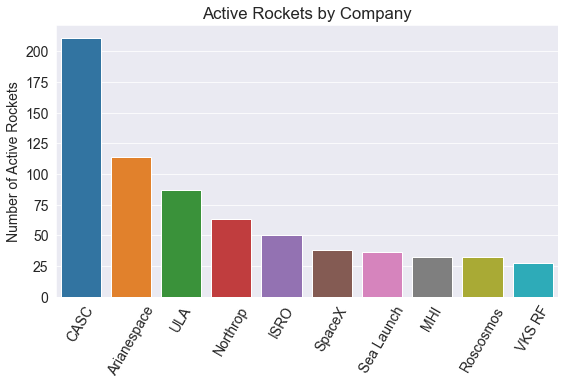

In [45]:
plt.xticks(rotation=60)
plt.title('Active Rockets by Company')
sns.barplot(x=active_rockets.index, y=active_rockets)
plt.ylabel('Number of Active Rockets');

**Observations**

CASC (China Aerospace Science and Technology Corporation) have most number of active rockets with 211 active Rockets is followed by world's first commercial launch service provider Arianespace with 114 Active Rockets
ISRO stands 5th with 50 and followed by Elon's Spacex with 38 active rockets

#### Which are the top launching locations

In [49]:
location_df = space_mission_df.groupby(['Location', 'Country']).size().reset_index(name='Counts')
location_df

,Location,Country,Counts
0,"Blue Origin Launch Site, West Texas, Texas, USA",USA,12
1,"Brigitte, Hammaguir, Algeria, France",France,4
2,"Cosmic Girl, Mojave Air and Space Port, Califo...",USA,1
3,"Douglas F4D Skyray, Naval Air Station Point Mu...",USA,6
4,"ELA-1, Guiana Space Centre, French Guiana, France",France,15
...,...,...,...
132,"Taiyuan Satellite Launch Center, China",China,7
133,"Uchinoura Space Center, Japan",Japan,7
134,"VLS Pad, Alc?›ntara Launch Center, Maranh?œo, ...",Brazil,3
135,"Vertical Launch Area, Spaceport America, New M...",New Mexico,4


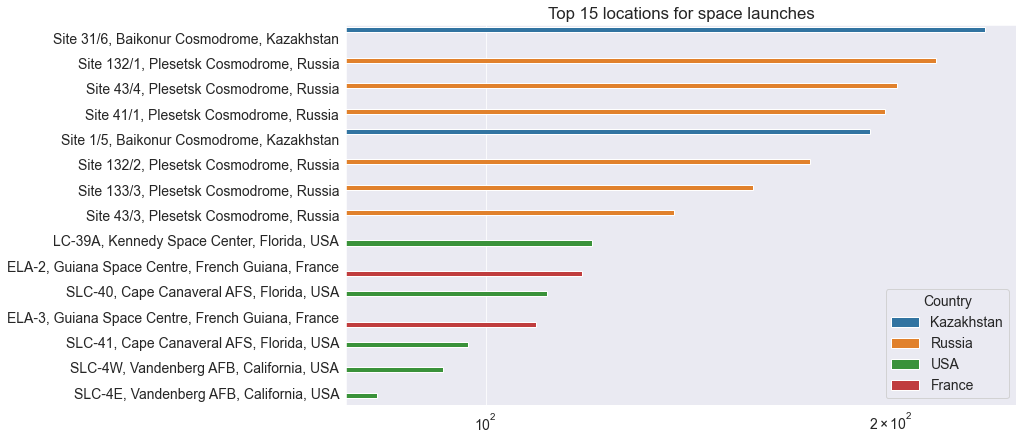

In [50]:
plt.figure(figsize=(12,7))
sns.barplot(data=location_df.sort_values(by=['Counts'], ascending=False).head(15), x="Counts", y="Location", hue='Country')
plt.xscale('log')
plt.title('Top 15 locations for space launches')
plt.xlabel('')
plt.ylabel('');

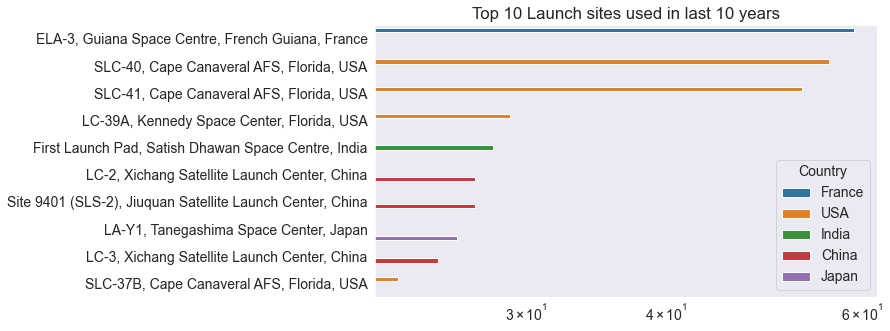

In [51]:
last_ten_location_df = last_ten_years_df.groupby(['Location', 'Country']).size().reset_index(name='Counts')

sns.barplot(data=last_ten_location_df.sort_values(by=['Counts'], ascending=False).head(10), x="Counts", y="Location", hue='Country')
plt.xscale('log')
plt.title('Top 10 Launch sites used in last 10 years')
plt.xlabel('')
plt.ylabel('');

#### Observations

Since Russia completed most number of launches the launch sites used mostly are russian
But when we consider the last ten years USA dominates

#### Most favorite month for space launches

In [52]:
month_wise_missions = space_mission_df.groupby('Month')['Month'].count()
month_wise_missions

Month
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Month, dtype: int64

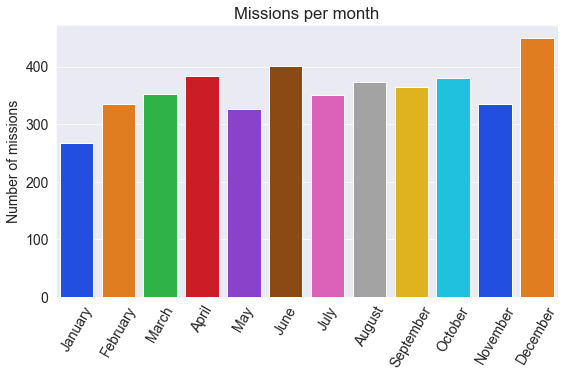

In [54]:
plt.title('Missions per month')
sns.barplot(x=pd.to_datetime(month_wise_missions.index, format = '%m').month_name(), y=month_wise_missions, palette='bright')
plt.xticks(rotation=60)
plt.ylabel('Number of missions')
plt.xlabel('');

#### Observations

From the above graph we cannot land to most favorite month since almost all months launches count is in the range of (350 -450)
but December is the month having most number of launches

#### SpaceX stats in Space Race

In [55]:
spaceX_df = space_mission_df[space_mission_df['Company Name'] == 'SpaceX']

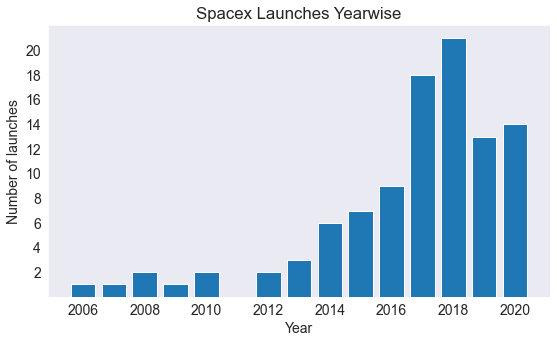

In [79]:
x = spaceX_df['Year'].value_counts()
plt.bar(x.index,x)
plt.yticks(np.arange(2,21,2))
#plt.xticks(np.arange(2006,2021,1),rotation=50,fontsize=12)
plt.title('Spacex Launches Yearwise')
plt.ylabel('Number of launches')
plt.xlabel('Year')
plt.grid(False)

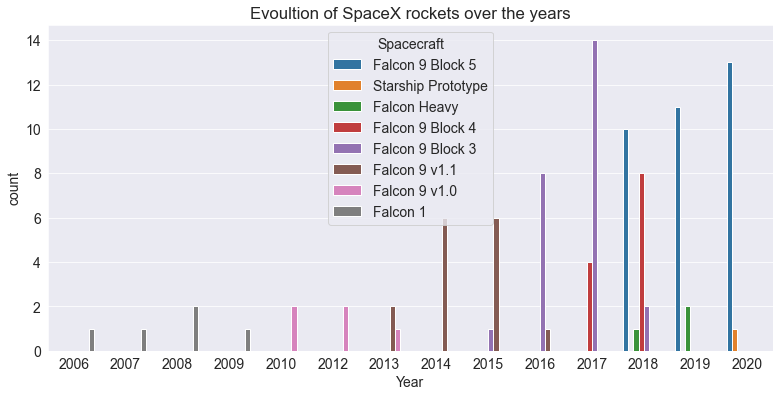

In [80]:
plt.figure(figsize=(13,6))
sns.countplot(x='Year',data=spaceX_df,hue='Spacecraft')
plt.title('Evoultion of SpaceX rockets over the years');

In [58]:
statuses_count = spaceX_df['Status Mission'].value_counts()

<ipython-input-65-931ebd112684>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(statuses_count.index,statuses_count,color='grby')


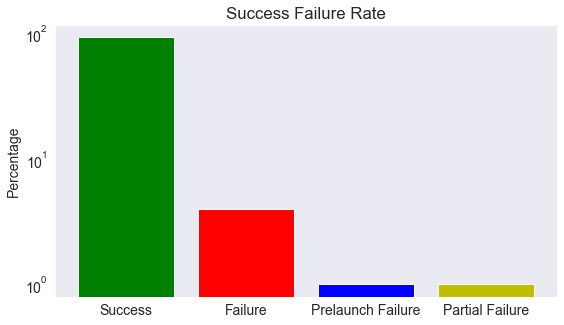

In [65]:
plt.bar(statuses_count.index,statuses_count,color='grby')
plt.ylabel("Percentage")
plt.yscale('log')
plt.grid(False)
plt.title('Success Failure Rate');

**Observations**

Spacex is growing exponentialy and the Success rate is high due to their evolved Falcon 9 rockets.

## Inferences and Conclusion

+ The Space race which started in late 1950's had slowed down gradually but picking up pace in recent years.
+ the dataset in good shape except for the cost of rocket column.
+ Russia dominated the world in the early years of space race.
+ Some countries may not have Space centre for their launches so they launch from other places, this dataset is not enough to see which country carried out the missions.
+ Cost of launches reducing due to reusability and Success rate increasing with new evolved Spacecrafts.
+ Overall space race becoming more interesting with commercial organizations dominating govt funded space organizations.

## References and Future Work

For Future work, if we get more details on all missions like fuel capacity, distance covered and the number of days the mission took,etc. then we can visualize and might get helpful for future missions

Dataset used : https://www.kaggle.com/agirlcoding/all-space-missions-from-1957
